In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image
from auto_encoder2 import PAutoE

device = "cuda"

pimages = load_dataset().to(device)

In [7]:
T = 50
beta = torch.linspace(1e-4, 0.3, T, device=device)

alpha = 1 - beta

alpha_ = torch.zeros(T, device=device)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_

tensor([9.9990e-01, 9.9368e-01, 9.8142e-01, 9.6330e-01, 9.3962e-01, 9.1077e-01,
        8.7723e-01, 8.3956e-01, 7.9837e-01, 7.5431e-01, 7.0807e-01, 6.6033e-01,
        6.1177e-01, 5.6303e-01, 5.1473e-01, 4.6742e-01, 4.2160e-01, 3.7769e-01,
        3.3605e-01, 2.9694e-01, 2.6056e-01, 2.2704e-01, 1.9645e-01, 1.6878e-01,
        1.4397e-01, 1.2192e-01, 1.0251e-01, 8.5560e-02, 7.0889e-02, 5.8300e-02,
        4.7589e-02, 3.8555e-02, 3.1000e-02, 2.4736e-02, 1.9586e-02, 1.5389e-02,
        1.1996e-02, 9.2785e-03, 7.1196e-03, 5.4195e-03, 4.0922e-03, 3.0649e-03,
        2.2767e-03, 1.6773e-03, 1.2255e-03, 8.8782e-04, 6.3777e-04, 4.5425e-04,
        3.2075e-04, 2.2453e-04], device='cuda:0')

In [8]:
pimages[0].shape

torch.Size([386, 3, 64, 64])

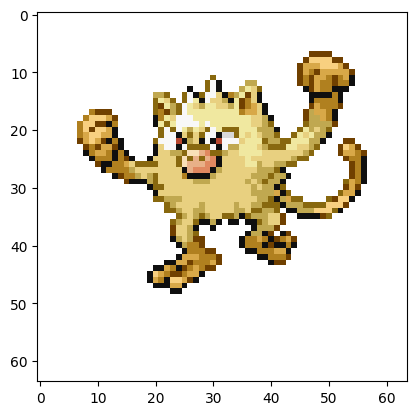

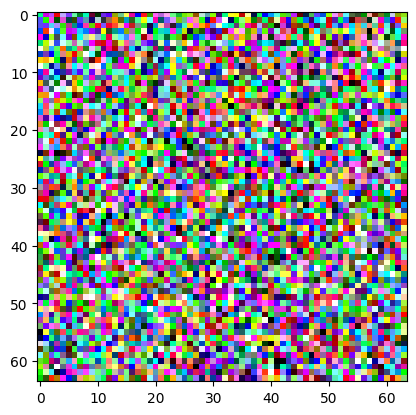

In [10]:
t = -1
x0 = pimages[0][55]

z = torch.randn(x0.shape).to(device)
xt = x0 * torch.sqrt(alpha_[t]) + z * torch.sqrt(1-alpha_[t])

plot_image(x0)
plot_image(xt)

In [11]:
for t in range(T):
    
    model = PAutoE(3, 3).to(device)

    loss_func = nn.MSELoss()    
    #optimizer = optim.SGD(model.parameters(), lr=1e-1)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
        
    pbar = tqdm(range(7001), miniters=5)
    def closure():
        
        optimizer.zero_grad()

        source = randint(0, 2)
        batch = torch.randperm(385)[:8]
        x0 = pimages[source][batch]

        e = torch.randn(x0.shape, device=device)
        
        x_nois = torch.sqrt(alpha_[t]) * x0 + torch.sqrt(1-alpha_[t]) * e
        e_pred = model(x_nois)

        # Calculate the loss between the result and the noise
        loss = loss_func(e, e_pred)
        loss.backward()
        
        pbar.set_description(f"t = {t}, %.8f" % loss, refresh=False)
        
        return loss
            
    model.train()
    for j in pbar:
        optimizer.step(closure)

    script = torch.jit.script(model)
    script.save(f"./model_{t}.pt")

t = 49, 0.00144245: 100%|██████████████████████████████████████████| 7001/7001 [03:04<00:00, 37.99it/s]


In [4]:
from UNet import UNet

In [5]:
model = UNet(3,3,8).to(device)

In [6]:
def noise_images(x, t):
    "Add noise to images at instant t"
    a = torch.sqrt(alpha_[t])[:, None, None, None]
    b = torch.sqrt(1 - alpha_[t])[:, None, None, None]
    Ɛ = torch.randn_like(x)
    return a * x + b * Ɛ, Ɛ

batch_size = 8

t = torch.randint(low=1, high=13, size=(batch_size,), device=device)

source = randint(0, 2)
batch = torch.randperm(385)[:batch_size]
x0 = pimages[source][batch]

x_t, noise = noise_images(x0, t)

model(x_t, t)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x8 and 16x32)

In [18]:
torch.randint(low=1, high=13, size=(3,))

tensor([4, 7, 2])

In [37]:
t

tensor([10,  9,  1,  2, 10, 12,  7,  6,  2])

In [41]:
3 //2

1